In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.target[[10, 50, 85]]
list(cancer.target_names)

['malignant', 'benign']

In [3]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df['target_names'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [42]:
classes = pd.unique(df.iloc[:,-1])
data = df.values
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [43]:
class NaiveBayes:
    def __init__(self, classes):
        self.classes = classes
        self.X_train = None
        self.y_train = None

    def treino(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def pred(self, X_test):
        def likelihood(y, Z):
            def gaussian(x, mu, sig):
                return np.exp(-np.power(x - mu, 2.)/(2*np.power(sig, 2.)))
            prob = 1
            for j in np.arange(0, Z.shape[1]):
                m = np.mean(Z[:,j])
                s = np.std(Z[:,j])      
                prob = prob*gaussian(y[j], m, s)
            return prob
        
        valores = pd.DataFrame(data=np.zeros((X_test.shape[0], len(self.classes))), columns=self.classes) 
        for i in np.arange(0, len(self.classes)):
            elements = tuple(np.where(self.y_train == self.classes[i]))
            Z = self.X_train[elements,:][0]
            for j in np.arange(0,X_test.shape[0]):
                x = X_test[j,:]
                pj = likelihood(x, Z)
                valores[self.classes[i]][j] = pj*len(elements)/self.X_train.shape[0]
        return valores

In [44]:
def pred(prev):
    y_pred = []
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(prev.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype=str)
    return y_pred

In [45]:
y_prede = []
y_teste = []
taxa_de_acerto = []
for i in range(20):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)
  y_teste.append(y_test)
  nb = NaiveBayes(classes)
  nb.treino(X_train, y_train)
  prev = nb.pred(X_test)
  print(prev)
  p = pred(prev)
  score = accuracy_score(p, y_test)
  taxa_de_acerto.append(score)
  print('Accuracy:', score)
  y_prede.append(p)

        malignant        benign
0    3.968579e-09  1.059853e-13
1    1.414793e-12  7.325277e-33
2    9.824769e-09  2.759615e-06
3    4.270380e-19  1.140800e-08
4    1.149063e-09  6.168830e-11
..            ...           ...
109  3.223322e-13  1.068563e-07
110  1.484139e-14  6.897016e-05
111  2.384391e-15  1.845072e-07
112  5.479402e-05  7.256823e-73
113  6.444249e-35  5.443284e-36

[114 rows x 2 columns]
Accuracy: 0.8771929824561403
        malignant        benign
0    1.501577e-08  1.318178e-24
1    4.828172e-06  3.165736e-42
2    3.640132e-05  1.220080e-76
3    9.176294e-09  3.564552e-10
4    3.530518e-16  2.611747e-10
..            ...           ...
109  9.436455e-13  1.531455e-06
110  9.364850e-05  2.589930e-62
111  2.239417e-14  2.909309e-04
112  1.515002e-17  1.723458e-07
113  1.748782e-11  6.013091e-06

[114 rows x 2 columns]
Accuracy: 0.8947368421052632
        malignant         benign
0    2.575263e-09   2.031552e-12
1    1.609547e-11   1.917604e-07
2    3.394780e-09   6.95030

In [46]:
def geclosest(value, lista):
  array = np.array(lista)
  index = np.argmin(abs(array - value))
  return index

In [47]:
media = np.mean(taxa_de_acerto)
representante = geclosest(media, taxa_de_acerto)
print(media)

0.9236842105263158


In [48]:
representante = geclosest(media, taxa_de_acerto)

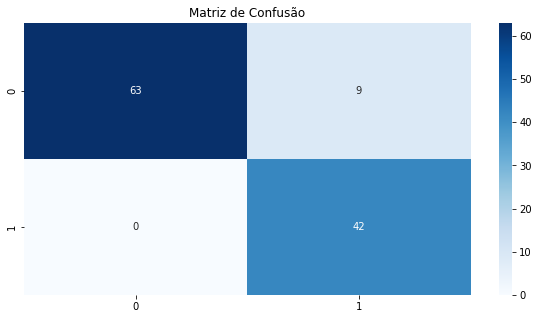

In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
conf = confusion_matrix(y_teste[representante], y_prede[representante])
res = sns.heatmap(conf, annot=True,fmt="d", cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
plt.show;